In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier #(KNN)
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm #to compute p-values 
from patsy import dmatrices
from sklearn import metrics
%matplotlib inline

## 1. Classification

#### PROJECT GOAL

Background:We are using the variables, including the temperature, lumiosity, radius, magnitude, color of spectrum and spectral class to identify which type (Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence, Super Giants and Hyper Giants) the star belongs to.

#### DATA DICTIONARY

There are 7 variables in total, the detailed descriptions are listed below:

Temparature: Temperature(K) (Numerical)

L: Relative Luminosity (Numerical)

R: Relative Radius (Numerical)

AM: Absolute Magnitude (Numerical)

Color: General Color of Spectrum (Numerical)

SpectralClass: O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types (https://en.wikipedia.org/wiki/Asteroid_spectral_types) (Categorical)

Type: Red Dwarf - 0, Brown Dwarf - 1, White Dwarf - 2, Main Sequence - 3, Super Giants - 4, Hyper Giants - 5

Data Reference:Kaggle Dataset (https://www.kaggle.com/datasets/brsdincer/star-type- classification)

## Explainatory Data Analysis (EDA)

In [3]:
df = pd.read_csv('Stars.csv')

In [4]:
 df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [6]:
 #Missing Value Analysis
df.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

<AxesSubplot:>

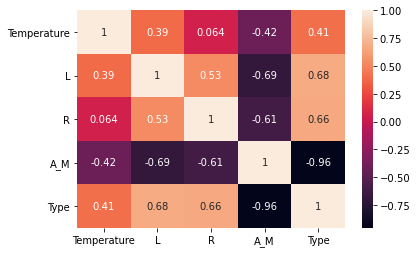

In [7]:
sns.heatmap(df.corr(),annot=True)

We can see from the heatmap that L, R, A_M are correlated with type of more than 0.5 correlation.

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

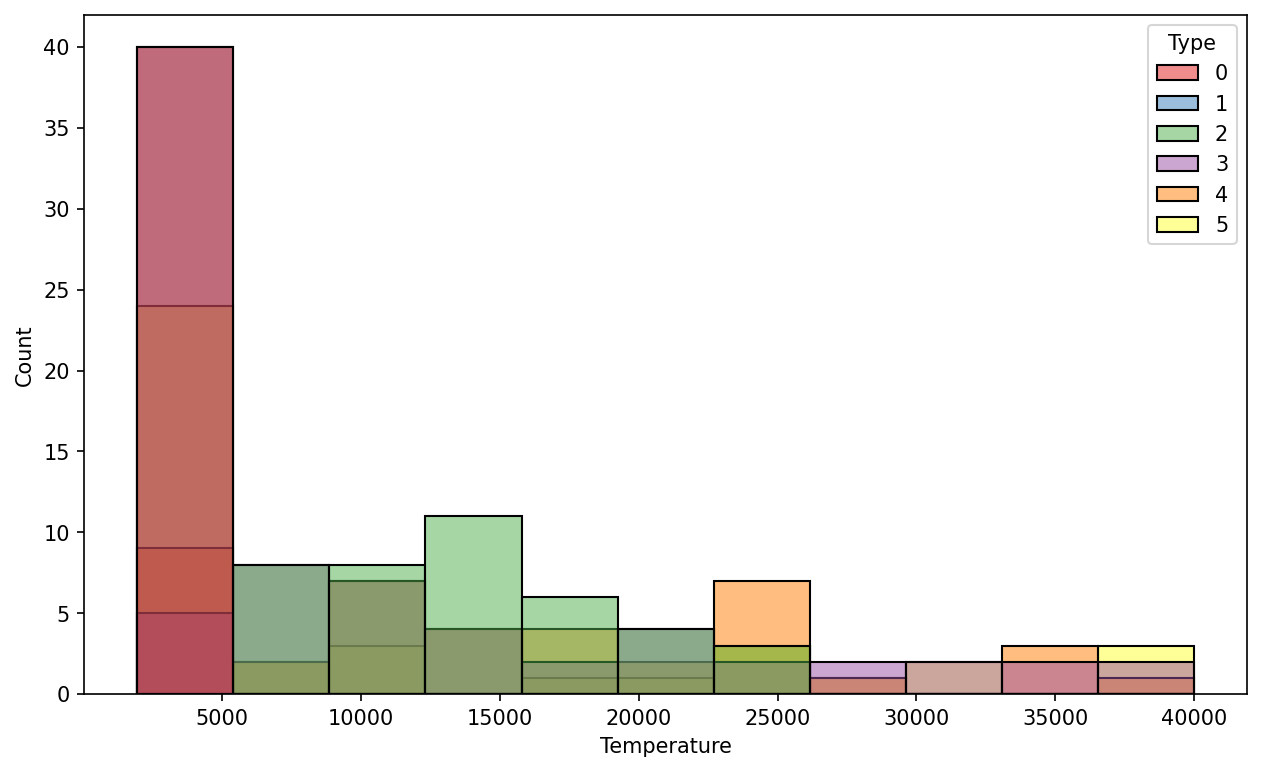

In [9]:
plt.figure(figsize=(10,6),dpi=150) 
sns.histplot(x=df['Temperature'],hue=df['Type'],palette='Set1')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

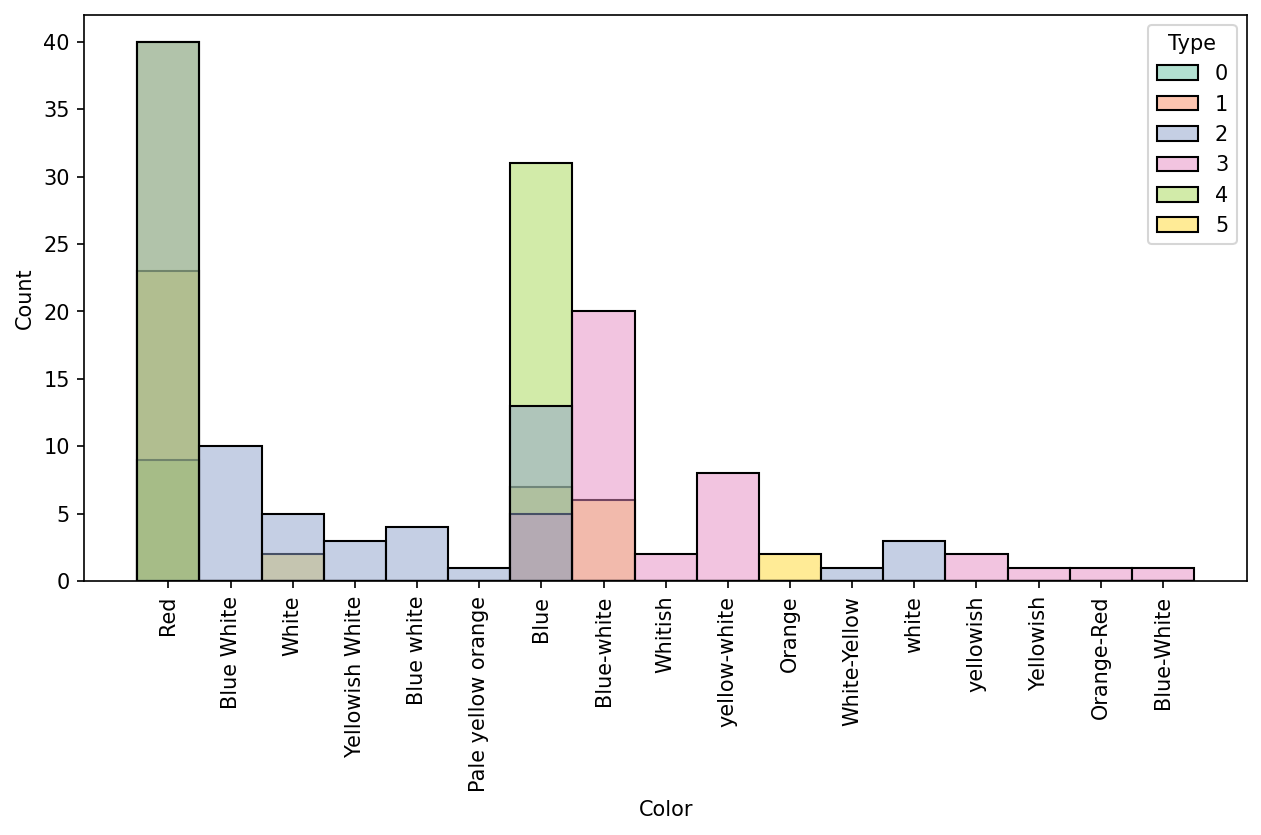

In [10]:
plt.figure(figsize=(10,5),dpi=150) 
sns.histplot(x=df['Color'],hue=df['Type'],palette='Set2') 
plt.xticks(rotation=90)

<Figure size 600x400 with 0 Axes>

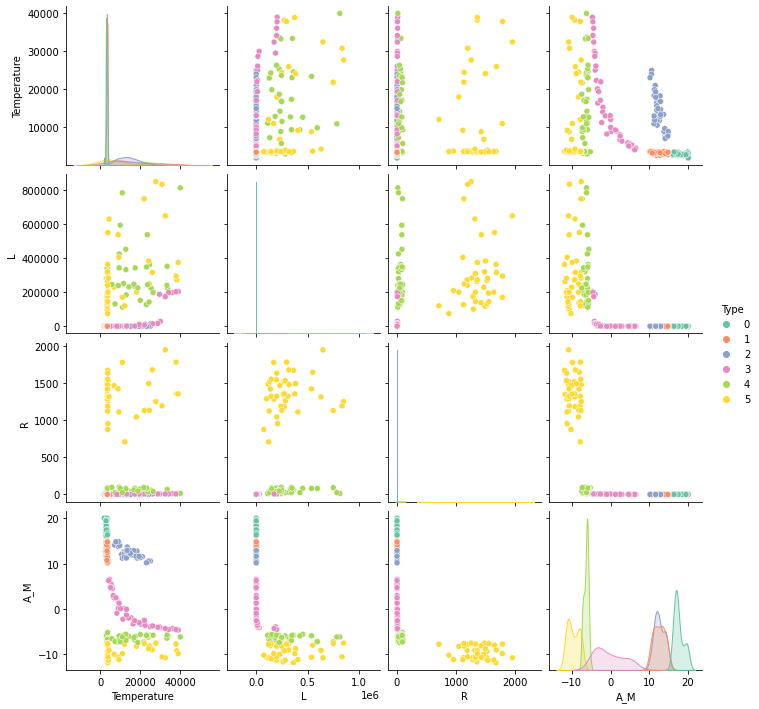

In [11]:
plt.figure(dpi=100) 
sns.pairplot(df,hue='Type',palette='Set2',diag_kind='kde')

## Modeling

In [38]:
X=pd.get_dummies(df.drop('Type',axis=1)) 
y=df['Type']

In [39]:
y.unique()

array([0, 1, 2, 3, 4, 5])

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 42)

In [41]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()

In [42]:
X_train=scaler.fit_transform(X_train) 
X_test=scaler.transform(X_test)

## Logistic Regression

In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train) 
accuracy_score(y_test, lr.predict(X_test))

1.0

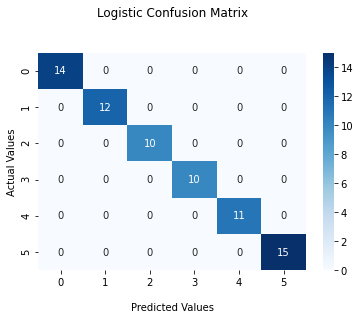

In [44]:
cnf_matrix=metrics.confusion_matrix(y_test,lr.predict(X_test)) 
ax=sns.heatmap(cnf_matrix,annot=True,cmap='Blues') 
ax.set_title('Logistic Confusion Matrix\n\n'); ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
plt.show()

Thus, the accuracy score of logistic model is 1

## LDA fit

In [45]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train) 
accuracy_score(y_test, lda.predict(X_test))

0.9722222222222222

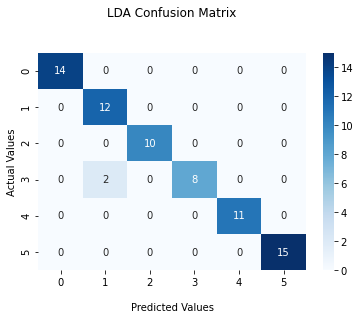

In [46]:
cnf_matrix=metrics.confusion_matrix(y_test,lda.predict(X_test)) 
ax=sns.heatmap(cnf_matrix,annot=True,cmap='Blues') 
ax.set_title('LDA Confusion Matrix\n\n'); 
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
plt.show()

Thus, the accuracy score of LDA model is 0.972

## QDA fit

In [47]:
qda = QuadraticDiscriminantAnalysis() 
qda.fit(X_train, y_train) 
accuracy_score(y_test, qda.predict(X_test))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.6944444444444444

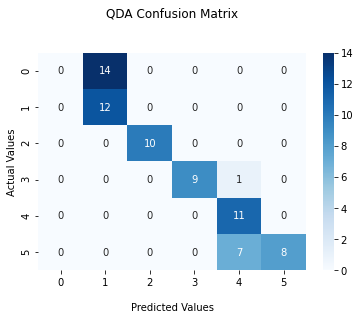

In [48]:
cnf_matrix=metrics.confusion_matrix(y_test,qda.predict(X_test)) 
ax=sns.heatmap(cnf_matrix,annot=True,cmap='Blues') 
ax.set_title('QDA Confusion Matrix\n\n'); 
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
plt.show()

Thus, the accuracy score of QDA model is only 0.694

## KNN

In [49]:
knn_model=KNeighborsClassifier() 
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
accuracy=[]
k=[]
for K in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=K) 
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test)) 
    k.append(K)
    accuracy.append(acc)
    print('K = {:3}, accuracy = {:.4f}'.format(K, acc))

K =   1, accuracy = 0.9444
K =   2, accuracy = 0.9306
K =   3, accuracy = 0.9306
K =   4, accuracy = 0.9028
K =   5, accuracy = 0.9167
K =   6, accuracy = 0.8889
K =   7, accuracy = 0.8889
K =   8, accuracy = 0.8889
K =   9, accuracy = 0.8750
K =  10, accuracy = 0.8611
K =  11, accuracy = 0.8750
K =  12, accuracy = 0.8611
K =  13, accuracy = 0.8611
K =  14, accuracy = 0.8472
K =  15, accuracy = 0.8472
K =  16, accuracy = 0.8472
K =  17, accuracy = 0.8472
K =  18, accuracy = 0.8472
K =  19, accuracy = 0.8611
K =  20, accuracy = 0.8472
K =  21, accuracy = 0.8611
K =  22, accuracy = 0.8611
K =  23, accuracy = 0.8333
K =  24, accuracy = 0.8056
K =  25, accuracy = 0.8056
K =  26, accuracy = 0.7917
K =  27, accuracy = 0.7917
K =  28, accuracy = 0.7917
K =  29, accuracy = 0.7917
K =  30, accuracy = 0.7917
K =  31, accuracy = 0.7917
K =  32, accuracy = 0.7917
K =  33, accuracy = 0.7917
K =  34, accuracy = 0.6806
K =  35, accuracy = 0.6806
K =  36, accuracy = 0.6806
K =  37, accuracy = 0.6806
K

In [51]:
max(accuracy)

0.9444444444444444

In [52]:
a=list(zip(k,accuracy)) 
b=pd.DataFrame(a,columns=['k','accuracy']) 
b.loc[b['accuracy'] >= 0.9444444444444444]

,k,accuracy
0,1,0.944444


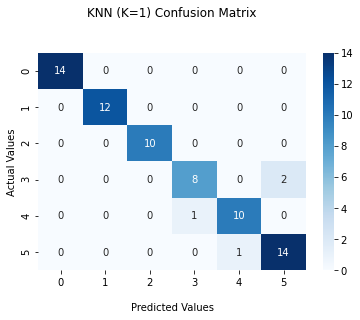

In [53]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
cnf_matrix=metrics.confusion_matrix(y_test,knn.predict(X_test)) 
ax=sns.heatmap(cnf_matrix,annot=True,cmap='Blues') 
ax.set_title('KNN (K=1) Confusion Matrix\n\n'); 
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
plt.show()

Text(0, 0.5, 'accuracy')

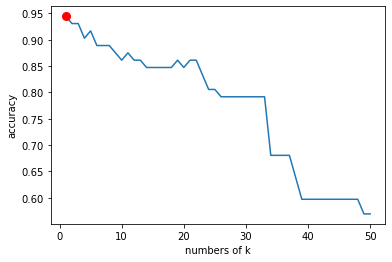

In [54]:
plt.plot(k,accuracy)
plt.plot(k[0],max(accuracy),marker = 'o',color = 'red',markersize = 8) 
plt.xlabel('numbers of k')
plt.ylabel('accuracy')

The highest accuracy occurs when K=1, with an accuracy of 0.944

## Model Summary

In [60]:
results_dict = {}
results_dict['Logistic'] = accuracy_score(y_test, lr.predict(X_test)) 
results_dict['LDA'] = accuracy_score(y_test, lda.predict(X_test)) 
results_dict['QDA'] = accuracy_score(y_test, qda.predict(X_test)) 
results_dict['KNN(K=1)'] = max(accuracy)
result = pd.DataFrame(results_dict,index = ['Accuracy score']).T.sort_values(by='Accuracy score',ascending=False)
result

,Accuracy score
Logistic,1.000000
LDA,0.972222
KNN(K=1),0.944444
QDA,0.694444


<AxesSubplot:>

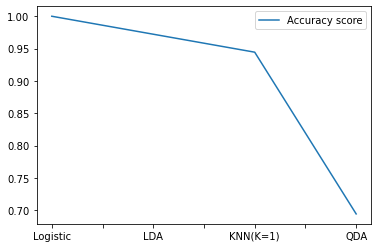

In [61]:
result.plot(y='Accuracy score', use_index=True)

We can see from the above result that the logistic model best fit our dataset since it provide the highest accuracy score of 1 among all the methods. Since QDA provides with the lowest accurate score, comparing with non-linear model, a linear model is more appropriate.
We then do the bootstrap to evaluate the performance of the logistic model

## Bootstrap for evaluation

In [62]:
# Original Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [63]:
boot_accuracy_score = list() 
n_boots = 1000
n_points = len(X_train)

In [65]:
# Bootstrapping the training set data points 1000 times.
# Every time we fit a logistic model on the bootstrapping sample,
# predicted the test label and computed the accuracy score on test set. 
for _ in range(n_boots):
    
    boot_index = np.random.choice(list(range(len(X_train))),n_points,replace = True)
    boot_X_train = X_train.iloc[boot_index,:].copy()
    boot_y_train = y_train.iloc[boot_index].copy()
    
    scaler = StandardScaler()
    boot_X_train_scaled = scaler.fit_transform(boot_X_train)
    
    lr = LogisticRegression()
    lr.fit(boot_X_train_scaled, boot_y_train)
    
    boot_acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
    boot_accuracy_score.append(boot_acc)

In [66]:
boot_mean_acc = np.mean(boot_accuracy_score)
print(boot_mean_acc)

0.9848472222222222


In [67]:
# Function for bootstrapping score histogram

def boot_histplot(col,boot_mean,title):
    sns.displot(col, alpha = 0.25)
    plt.axvline(boot_mean,color='red')
    plt.title('Bootstrapping '+ title)
    plt.legend(["The Mean of bootstrapping Accuracy Score = {:.4f}".format(boot_mean)])
    plt.show()

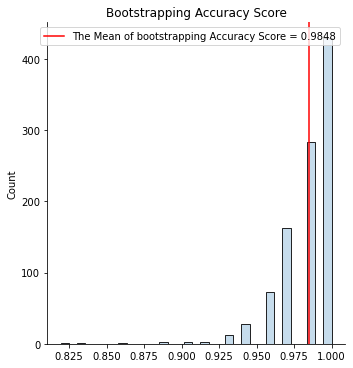

In [68]:
boot_histplot(boot_accuracy_score,boot_mean_acc,"Accuracy Score")

We can see that using bootstrap, we can get the accuracy of 0.98 for our logistic model, which shows a good performance of the model.